# RMSprop

## A ideia é similar a Adagrad, contudo, podemos perceber que quanto maior for a rede neural e o treino, menor a taxa de aprendizado será. E isto é algo que não desejamos, pois não necessariamente o treino terá terminado e teremos um valor de $\alpha$ pequeno.

## RMSprop resolve este problema substituindo a soma dos erros por uma soma ponderada, a formula continua a mesma, porém teremos

## $\alpha_t = \frac{\alpha}{\sqrt{v' + \epsilon}}$

## $v'= \gamma*v + (1- \gamma)dL^2/dw$

## $\gamma$ diz o peso de cada contribuição, geralmente se usa algo entre 0.85-0.95, porém fica a critério do operador decidir.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
f = lambda x,w: x @ w # Função que descreve uma parabola para o nosso caso, em que temos
# f: X[:,0]*w[0] + X[:,1]*w[1] + X[:,2]*w[2]

w = np.random.normal(0,1,(3,1)) # pesos

X = np.arange(-20,20,0.1).reshape(-1,1) # dados

y = X**2 + 5*X + 1 # função a ser encontrada, que não conhecemos, porém sabemos é uma função polinomial 

X_in = np.append(X**2,np.append(X,np.ones(X.shape),axis = 1),axis = 1).reshape(-1,3) # adicionando 1 para poder fazer o produto interno ao invés de multiplicações
print(X_in)

[[400.   -20.     1.  ]
 [396.01 -19.9    1.  ]
 [392.04 -19.8    1.  ]
 ...
 [388.09  19.7    1.  ]
 [392.04  19.8    1.  ]
 [396.01  19.9    1.  ]]


In [153]:
def RMSprop(X,y,w,loss_a,gamma= 0.95,lr = 0.00000001):
    loss_a = np.copy(loss_a)
    for _ in range(1000):
        yhat = f(X,w)
        loss = np.mean((y - yhat)**2)
        print('loss:',loss)
        for i in range(len(w)):
            w[i][0] +=  (lr/np.sqrt(1e-8+loss_a[i]))*((y-yhat).T @ X[:,i])/len(yhat)
            loss_a[i] = gamma*loss_a[i] + (1-gamma)*(((lr*(y-yhat).T @ X[:,i])/len(yhat))**2)
        

    return w.reshape(-1,1),loss_a

In [154]:
loss_a = [0.02 for i in range(len(w))]
for i in range(1):
    w,loss_a = RMSprop(X_in,y,w,loss_a)
    print(w,loss_a)

loss: 0.02921357155668112
loss: 0.029213569703750494
loss: 0.02921356780268666
loss: 0.02921356585223729
loss: 0.029213563851117133
loss: 0.029213561798011982
loss: 0.029213559691572816
loss: 0.029213557530411837
loss: 0.029213555313106872
loss: 0.029213553038203496
loss: 0.02921355070420306
loss: 0.029213548309568314
loss: 0.02921354585272752
loss: 0.02921354333206021
loss: 0.029213540745914486
loss: 0.02921353809258536
loss: 0.0292135353703278
loss: 0.02921353257735285
loss: 0.02921352971182255
loss: 0.029213526771851496
loss: 0.02921352375550593
loss: 0.029213520660802912
loss: 0.029213517485707507
loss: 0.029213514228129133
loss: 0.029213510885925487
loss: 0.029213507456900493
loss: 0.029213503938797708
loss: 0.029213500329299976
loss: 0.029213496626039365
loss: 0.02921349282657435
loss: 0.029213488928408773
loss: 0.02921348492897928
loss: 0.029213480825652952
loss: 0.02921347661573245
loss: 0.0292134722964492
loss: 0.029213467864961613
loss: 0.02921346331835441
loss: 0.02921345865

Pesos finais:  [1.00093002 5.00005599 0.7768075 ]


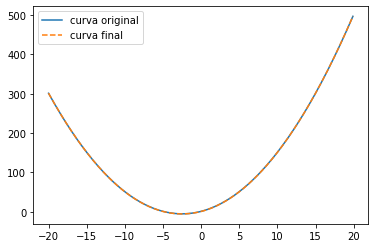

In [ ]:

print('Pesos finais: ', w.flatten())

plt.plot(X,y,label = 'curva original')
plt.plot(X,f(X_in,w),'--',label = 'curva final')
plt.legend()

## O otimizador oscila por conta de que inicializamos o erro anterior a 0.02 toda vez que ele oscila, ao invés de guardar esse valor